<a href="https://colab.research.google.com/github/nithinrk11/Feynn-Labs-Machine-Learning-Internship/blob/main/Project%203/obesity_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Load dependencies

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [3]:
!git clone https://github.com/nithinrk11/Feynn-Labs-Machine-Learning-Internship.git
%cd Feynn-Labs-Machine-Learning-Internship

Cloning into 'Feynn-Labs-Machine-Learning-Internship'...
remote: Enumerating objects: 275, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 275 (delta 74), reused 5 (delta 5), pack-reused 127 (from 1)
Receiving objects: 100% (275/275), 11.02 MiB | 9.93 MiB/s, done.
Resolving deltas: 100% (114/114), done.
/content/Feynn-Labs-Machine-Learning-Internship


##Load the dataset

In [4]:
# Load your dataset
data = pd.read_csv('/content/Feynn-Labs-Machine-Learning-Internship/Project 3/filtered_datasets/ObesityDataSet.csv')

# Display the first few rows
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

##Data preprocessing and ML

Preprocess the Data,
Label Encoding for categorical columns.
Feature Scaling for numerical columns like Height, Weight, etc

In [6]:
# Label encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['family_history_with_overweight'] = label_encoder.fit_transform(data['family_history_with_overweight'])
data['FAVC'] = label_encoder.fit_transform(data['FAVC'])
data['CAEC'] = label_encoder.fit_transform(data['CAEC'])
data['SMOKE'] = label_encoder.fit_transform(data['SMOKE'])
data['SCC'] = label_encoder.fit_transform(data['SCC'])
data['CALC'] = label_encoder.fit_transform(data['CALC'])
data['MTRANS'] = label_encoder.fit_transform(data['MTRANS'])

# Extract features and target
X = data.drop(columns=['NObeyesdad'])  # Features
y = label_encoder.fit_transform(data['NObeyesdad'])  # Target (Obesity Levels)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9574468085106383
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.90      0.90      0.90        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.89      0.88        56
           6       0.98      0.96      0.97        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



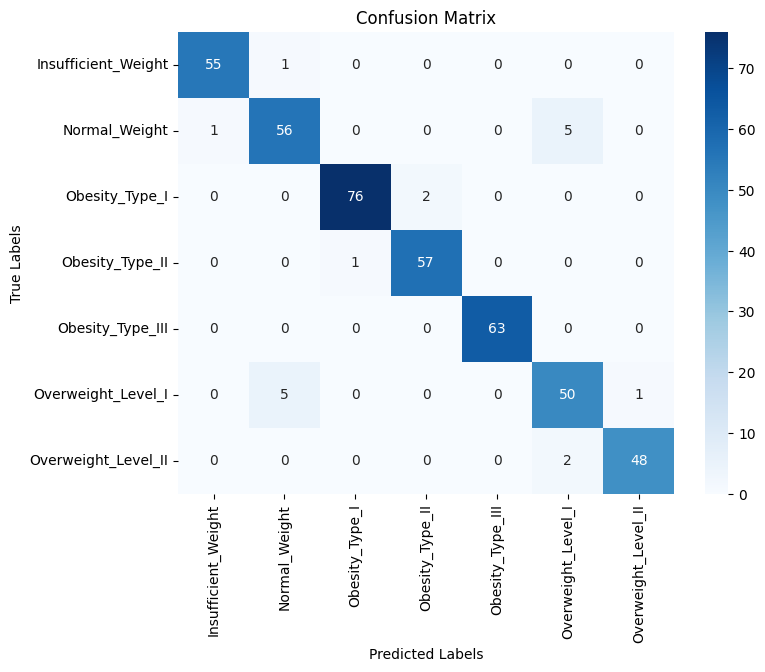

In [9]:
#confusion matrix plot

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [10]:
#cross validation

import numpy as np
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.74468085 0.98341232 0.98341232 0.98341232 0.98815166]
Mean Cross-Validation Score: 0.9366138953312493


                           Feature  Importance
3                           Weight    0.336245
2                           Height    0.104756
1                              Age    0.096946
6                             FCVC    0.096065
0                           Gender    0.051746
7                              NCP    0.050479
13                             TUE    0.047936
10                            CH2O    0.044603
12                             FAF    0.043289
14                            CALC    0.029407
8                             CAEC    0.029351
4   family_history_with_overweight    0.028007
15                          MTRANS    0.019524
5                             FAVC    0.014338
11                             SCC    0.005369
9                            SMOKE    0.001940


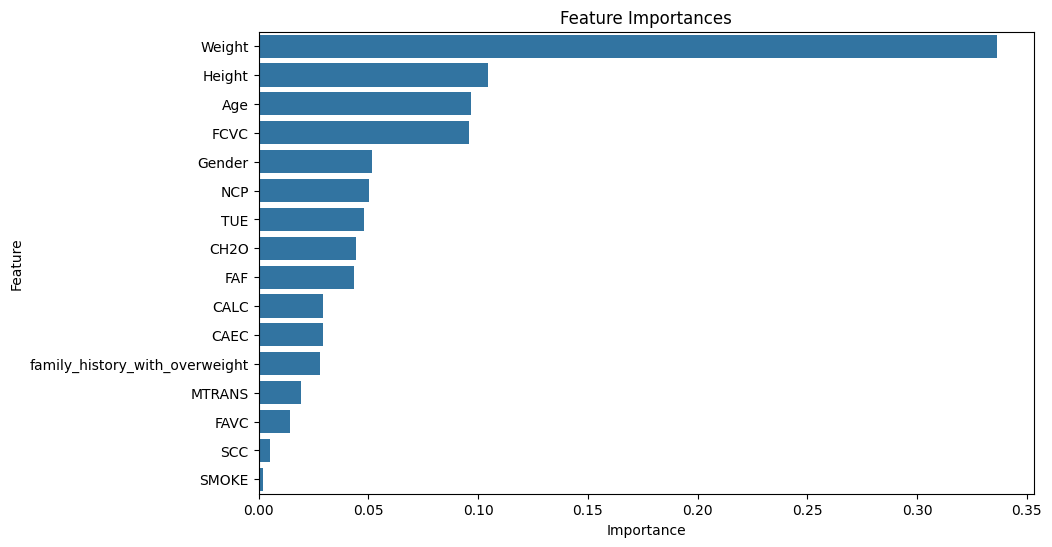

In [11]:
#feature importance

import pandas as pd
import matplotlib.pyplot as plt
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [12]:
#input some random data to predict

import pandas as pd
# Sample input data (replace with your own values)
new_data = pd.DataFrame({
    'Gender': [1],  # Male (0 for Female, 1 for Male)
    'Age': [25],
    'Height': [1.75],
    'Weight': [30],
    'family_history_with_overweight': [1],  # Yes (1) or No (0)
    'FAVC': [1],  # Frequently consumes high caloric food (1) or No (0)
    'FCVC': [2],
    'NCP': [3],
    'CAEC': [1],  # Always (1) or Sometimes (0)
    'SMOKE': [0],  # Smoker (1) or No (0)
    'CH2O': [2],
    'SCC': [0],  # Consume alcohol (1) or No (0)
    'FAF': [2],
    'TUE': [2],
    'CALC': [0],  # Consume alcohol (1) or No (0)
    'MTRANS': [3] # Public_Transportation
})

# Scale the new data using the same scaler used for training
new_data_scaled = scaler.transform(new_data)

# Make a prediction using the trained model
predicted_obesity_level = rf_model.predict(new_data_scaled)

# Get the class name from the label encoder
predicted_obesity_class = label_encoder.inverse_transform([predicted_obesity_level[0]])

print("Predicted Obesity Level:", predicted_obesity_class[0])


Predicted Obesity Level: Normal_Weight


##Let's drop the least important features and train the model again with the new refined dataset


In [13]:
data = data.drop(['SMOKE', 'SCC', 'FAVC', 'MTRANS'], axis=1)


In [14]:
# Label encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['family_history_with_overweight'] = label_encoder.fit_transform(data['family_history_with_overweight'])
data['CAEC'] = label_encoder.fit_transform(data['CAEC'])
data['CALC'] = label_encoder.fit_transform(data['CALC'])
# Extract features and target
X = data.drop(columns=['NObeyesdad'])  # Features
y = label_encoder.fit_transform(data['NObeyesdad'])  # Target (Obesity Levels)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FCVC                            2111 non-null   float64
 6   NCP                             2111 non-null   float64
 7   CAEC                            2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   FAF                             2111 non-null   float64
 10  TUE                             2111 non-null   float64
 11  CALC                            2111 non-null   int64  
 12  NObeyesdad                      21

In [16]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.950354609929078
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96        56
           1       0.89      0.87      0.88        62
           2       0.99      0.97      0.98        78
           3       0.97      0.98      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.89      0.88        56
           6       0.98      0.96      0.97        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



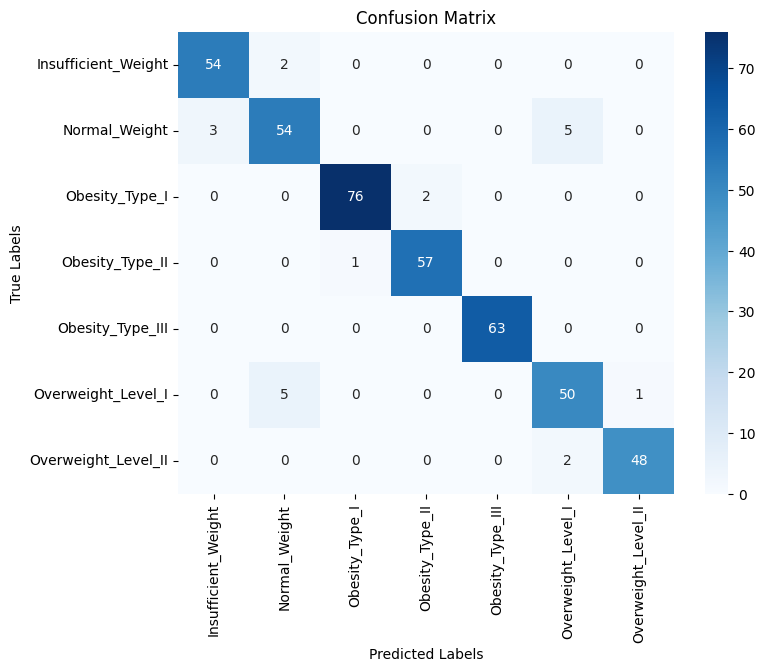

In [18]:
#confusion matrix plot

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [19]:
#cross validation

import numpy as np
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_scaled, y, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))


Cross-Validation Scores: [0.76122931 0.99052133 0.97393365 0.98578199 0.97867299]
Mean Cross-Validation Score: 0.9380278534054878


In [20]:
#input some random data to predict

import pandas as pd
# Sample input data (replace with your own values)
new_data = pd.DataFrame({
    'Gender': [1],  # Male (0 for Female, 1 for Male)
    'Age': [25],
    'Height': [1.75],
    'Weight': [30],
    'family_history_with_overweight': [1],  # Yes (1) or No (0)
    'FCVC': [2],
    'NCP': [3],
    'CAEC': [1],  # Always (1) or Sometimes (0)
    'CH2O': [2],
    'FAF': [2],
    'TUE': [2],
    'CALC': [0],  # Consume alcohol (1) or No (0)
})

# Scale the new data using the same scaler used for training
new_data_scaled = scaler.transform(new_data)

# Make a prediction using the trained model
predicted_obesity_level = rf_model.predict(new_data_scaled)

# Get the class name from the label encoder
predicted_obesity_class = label_encoder.inverse_transform([predicted_obesity_level[0]])

print("Predicted Obesity Level:", predicted_obesity_class[0])


Predicted Obesity Level: Normal_Weight


In [21]:
# prompt: unique values in NObeyesdad

unique_values = data['NObeyesdad'].unique()
print("Unique values in 'NObeyesdad':", unique_values)


Unique values in 'NObeyesdad': ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']
